In [6]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 

In [7]:
EMBEDDING_MODEL = 'GanymedeNil_text2vec-large-chinese'
EMBEDDING_TYPE = 'title&pyq'
SEED = 19260817

In [8]:
train_df = pd.read_csv(f'../../data/curated/{EMBEDDING_MODEL}/train_dataset_{EMBEDDING_TYPE}.csv')
val_df = pd.read_csv(f'../../data/curated/{EMBEDDING_MODEL}/val_dataset_{EMBEDDING_TYPE}.csv')
test_df = pd.read_csv(f'../../data/curated/{EMBEDDING_MODEL}/test_dataset_{EMBEDDING_TYPE}.csv')

### fit the model

In [9]:
train_X = train_df.drop('label', axis = 1)
train_Y = train_df['label']
test_X = test_df.drop('label', axis = 1)
test_Y = test_df['label']
val_X = val_df.drop('label', axis = 1)
val_Y = val_df['label']

In [10]:
CB_model = CatBoostRegressor(n_estimators=25, max_depth=16, subsample = 0.4, colsample_bylevel = 1, max_bin = 64, reg_lambda = 1, learning_rate = 1, random_seed = SEED, verbose = False)

In [11]:
CB_model.fit(train_X, train_Y)

In [12]:
val_y_pred = CB_model.predict(val_X)
val_r2 = r2_score(val_Y, val_y_pred)
val_r2

0.2610437563786808

In [13]:
test_y_pred = CB_model.predict(test_X)
test_r2 = r2_score(test_Y, test_y_pred)
test_r2

0.16427255118453077

### get feature importance

In [14]:
feature_importance = CB_model.feature_importances_

In [15]:
importance_df = pd.DataFrame({
    'Feature': train_X.columns,
    'Importance': feature_importance
})

In [16]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
50,title_18,1.057359e+01
63,title_31,9.613966e+00
4,pyq_text_4,7.869373e+00
59,title_27,7.839637e+00
20,pyq_text_20,7.812766e+00
...,...,...
62,title_30,3.356700e-07
31,pyq_text_31,2.949161e-07
24,pyq_text_24,2.042297e-07
7,pyq_text_7,1.094717e-09


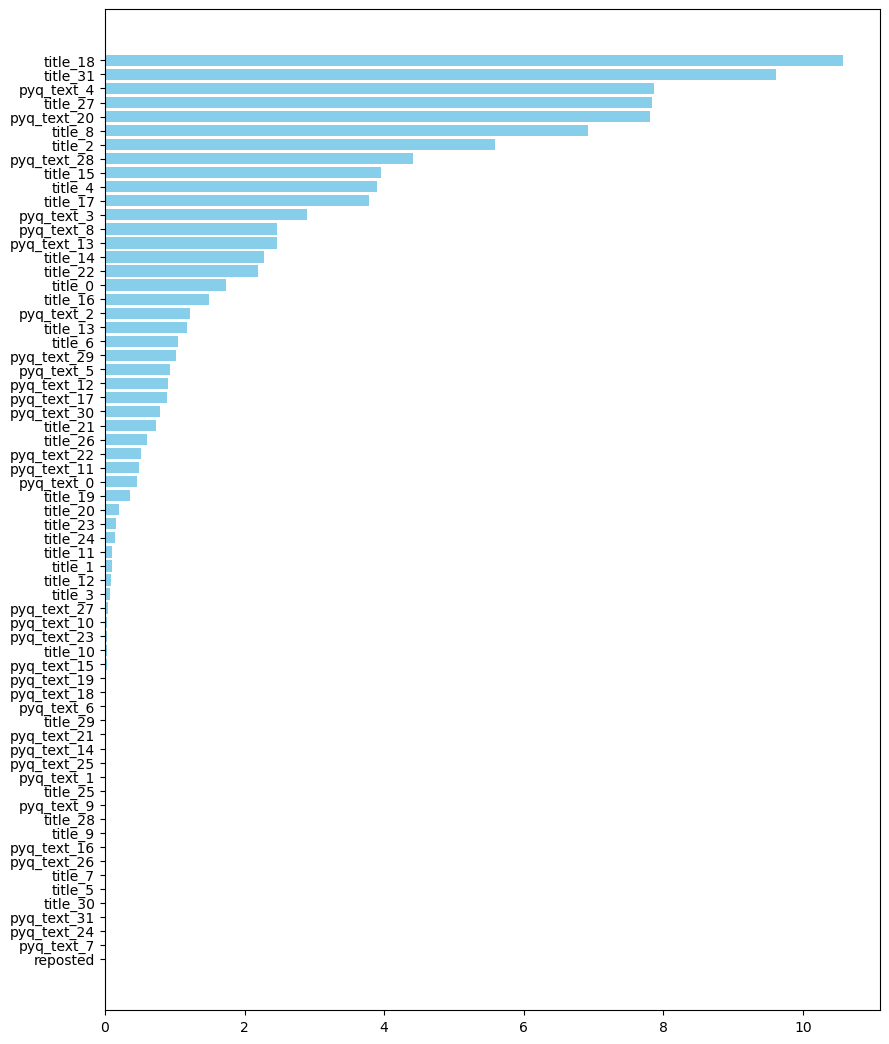

In [17]:
plt.figure(figsize=(10,13))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel = 'Feature'
plt.ylabel = 'Importance'
plt.title = 'RF Feature Importance Plot'
plt.gca().invert_yaxis()
plt.show()